# Modèles de covariance et processus gaussien


## Résumé

Dans ce segment, nous commençons par faire quelques rappels méthodologiques sur les processus gaussiens et les modèles de covariance. Nous analysons en particulier le modèle exponentiel carré. 
Nous montrons ensuite comment définir un modèle de covariance, une grille temporelle et un processus gaussien dans OpenTURNS. Nous observons l'influence des paramètres du modèle de covariance sur les trajectoires simulées. Nous présentons enfin comment définir la tendance.

## Classes OpenTURNS

* http://openturns.github.io/openturns/master/user_manual/_generated/openturns.SquaredExponential.html
* http://openturns.github.io/openturns/master/user_manual/_generated/openturns.GaussianProcess.html
* http://openturns.github.io/openturns/master/user_manual/_generated/openturns.ProcessSample.html
* http://openturns.github.io/openturns/master/examples/probabilistic_modeling/trend_transform.html


## Références

* Carl Edward Rasmussen and Christopher K. I. Williams (2006) Gaussian Processes for Machine Learning. Chapter 4: "Covariance Functions", www.GaussianProcess.org/gpml
* Greene, W. H. (2003). Econometric analysis, Seventh Edition. Pearson Education.

## Exemple : le modèle exponentiel carré anisotrope

Le modèle exponentiel carré anisotrope est la fonction de covariance définie par :
$$
k \left( \boldsymbol{x}, \boldsymbol{x}' \right) 
= \sigma^2 \exp\left( -\frac{1}{2} \left\|\frac{\boldsymbol{x}-\boldsymbol{x}'}{\boldsymbol{\theta}}\right\|_2^2\right)
$$
pour tout $\boldsymbol{x}, \boldsymbol{x}' \in \mathcal{D}$ 
où la division entre le vecteur $\boldsymbol{x} - \boldsymbol{x}'$ au numérateur et le vecteur $\boldsymbol{\theta}$ au dénominateur est la division composante par composante :
$$
{\left(\frac{\boldsymbol{x} - \boldsymbol{x}'}{\boldsymbol{\theta}}\right)}_i
= \frac{x_i - x'_i}{\theta_i}
$$
pour $i=1,...,d$.

Si toutes les composantes du vecteur d'hyperparamètres $\boldsymbol{\theta}\in\mathbb{R}^d$ sont égales alors le modèle est *isotrope* : le comportement est le même dans chacune des $d$ dimensions/directions du domaine $\mathcal{D}$. Sinon le modèle est *anisotrope* : c'est le cas dans la classe `SquaredExponential`. 

La classe `SquaredExponential` permet de construire des modèles de covariances de ce type :
* le paramètre $\sigma\in\mathbb{R}$ est le paramètre d'amplitude,
* le paramètre $\boldsymbol{\theta}\in\mathbb{R}^d$ est le paramètre d'échelle.

In [18]:
import openturns as ot
import openturns.viewer as otv

In [19]:
# Amplitude values
amplitude = [3.5]  # Processus à valeur dans R
# Scale values
scale = [1.5]  # Processus sur un domaine dans R
# Covariance model
covarianceModel = ot.SquaredExponential(scale, amplitude)

## Les processus gaussiens dans OpenTURNS

Pour créer un processus gaussien avec la classe `GaussianProcess`, il faut disposer 
* d'un modèle de covariance,
* d'un maillage.

De manière optionnelle, on peut considérer, en complément, une tendance (nous verrons comment le faire par la suite). Par défaut, le processus gaussien dans OpenTURNS est associé à une tendance nulle. 

Considérons le domaine $\mathcal{D}=[x_{\min},\:x_{\max}]$ où $x_{\min}=0$ et $x_{\max}=10$. 

Nous discrétisons ce domaine avec une grille régulière contenant $n=100$ mailles (et $n+1$ nœuds) par pas de $0.1$ à partir de $x_{\min}=0$ : 
$$
(x_0=x_{\min}=0,\:x_1=0.1,\:\ldots,\:x_n=x_{\max}=10).
$$

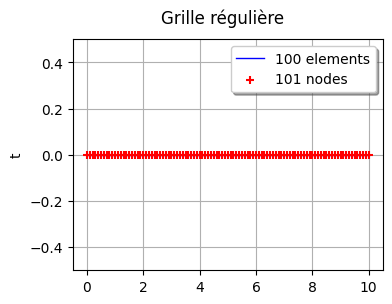

In [20]:
xMin = 0.0
step = 0.1
gridSize = 100
timeGrid = ot.RegularGrid(xMin, step, gridSize + 1)
graph = timeGrid.draw()
graph.setTitle("Grille régulière")
view = otv.View(graph, figure_kw={"figsize": (4.0, 3.0)})

Puis on crée le processus. Par défaut, la tendance est nulle.

In [21]:
process = ot.GaussianProcess(covarianceModel, timeGrid)
print(process)

GaussianProcess(trend=[x0]->[0], covariance=SquaredExponential(scale=[1.5], amplitude=[3.5]))


On génère ensuite un ensemble de 10 trajectoires avec la méthode `getSample`. Ces trajectoires sont stockées dans un `ProcessSample`. 

In [22]:
nbTrajectories = 10
sample = process.getSample(nbTrajectories)
type(sample)

openturns.func.ProcessSample

Il est facile de dessiner ces trajectoires avec la méthode `drawMarginal`.

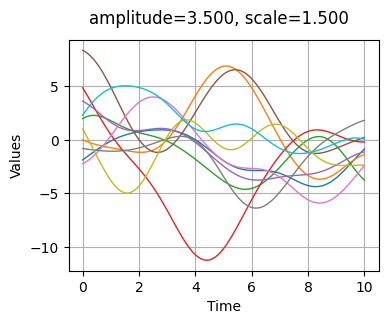

In [23]:
graph = sample.drawMarginal(0)
graph.setTitle(f"amplitude={amplitude[0]:.3f}, scale={scale[0]:.3f}")
view = otv.View(graph, figure_kw={"figsize": (4.0, 3.0)})

Pour faciliter le travail, on crée une fonction qui dessine le nombre donné de trajectoires.

In [24]:
def plotCovarianceModel(myCovarianceModel, timeGrid, nbTrajectories):
    """Plots the given number of trajectories with given covariance model."""
    process = ot.GaussianProcess(myCovarianceModel, timeGrid)
    sample = process.getSample(nbTrajectories)
    graph = sample.drawMarginal(0)
    graph.setTitle("")
    return graph

Le paramètre d'amplitude caractérise la variance du processus. Une valeur plus grande implique des valeurs absolues plus élevées. 

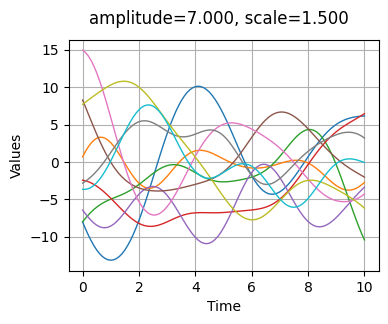

In [25]:
amplitude = [7.0]
scale = [1.5]
covarianceModel = ot.SquaredExponential(scale, amplitude)
graph = plotCovarianceModel(covarianceModel, timeGrid, 10)
graph.setTitle(f"amplitude={amplitude[0]:.3f}, scale={scale[0]:.3f}")
view = otv.View(graph, figure_kw={"figsize": (4.0, 3.0)})


Jouer sur l'unique paramètre d'échelle revient ici à dilater ou contracter le processus suivant le « temps » $x$. 

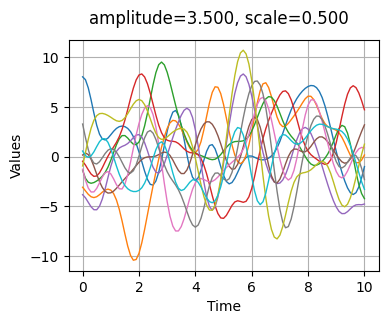

In [26]:
amplitude = [3.5]
scale = [0.5]
covarianceModel = ot.SquaredExponential(scale, amplitude)
graph = plotCovarianceModel(covarianceModel, timeGrid, 10)
graph.setTitle(f"amplitude={amplitude[0]:.3f}, scale={scale[0]:.3f}")
view = otv.View(graph, figure_kw={"figsize": (4.0, 3.0)})

## Définir la tendance

* La tendance est une fonction déterministe. 
* Avec la classe `GaussianProcess`, le processus ainsi créé est la somme d'une tendance et d'un processus gaussien de moyenne nulle. 



In [28]:
f = ot.SymbolicFunction(["x"], ["2 * x"])
fTrend = ot.TrendTransform(f, timeGrid)

In [29]:
amplitude = [3.5]
scale = [1.5]
covarianceModel = ot.SquaredExponential(scale, amplitude)
process = ot.GaussianProcess(fTrend, covarianceModel, timeGrid)
print(process)

GaussianProcess(trend=[x]->[2 * x], covariance=SquaredExponential(scale=[1.5], amplitude=[3.5]))


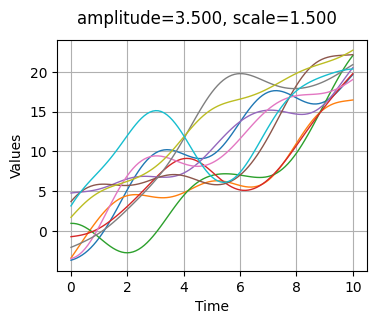

In [31]:
nbTrajectories = 10
sample = process.getSample(nbTrajectories)
graph = sample.drawMarginal(0)
graph.setTitle(f"amplitude={amplitude[0]:.3f}, scale={scale[0]:.3f}")
view = otv.View(graph, figure_kw={"figsize": (4.0, 3.0)})

## Exercices

### Liste des exercices

- Exercice 1 : noyau de Matérn et noyau exponentiel
- Exercice 2 : matrice de covariance
- Exercice 3 : générer des réalisations d'un vecteur gaussien
- Exercice 4 : processus gaussien et vecteur gaussien



### Exercice 1 : noyau de Matérn et noyau exponentiel

**Questions.**

Il y a d'autres modèles de covariances paramétriques dans OpenTURNS. Parmi les plus utilisés, on trouve :
* `MaternModel`. Le plus utilisé. Lorsque le paramètre $\nu\rightarrow+\infty$, converge vers le modèle exponentiel carré. Ce modèle est dérivable $k$ fois seulement si $k<\nu$. En d'autres termes, lorsque $\nu$ augmente, alors les trajectoires sont de plus en plus régulières. Le cas particulier $\nu=1/2$ est le modèle exponentiel.
* `SquaredExponential`. Ce modèle possède des dérivées à tous les ordres. Les processus gaussiens associés sont différentiables en moyenne quadratique à tous les ordres. 
* `ExponentialModel`. Le processus associé est continu, mais non différentiable.
* `AbsoluteExponential`. Ce modèle est mathématiquement équivalent au modèle de Matérn pour $\nu = 1/2$. Il définit une corrélation qui décroît de manière linéaire avec la distance à l'origine, ce qui conduit à des processus dont les trajectoires sont continues mais nulle part dérivables. Ce modèle est particulièrement utilisé pour modéliser des phénomènes physiques présentant une forte variabilité locale ou des irrégularités marquées (processus de type Markovien).
* `GeneralizedExponential`. Ce modèle introduit un paramètre de puissance supplémentaire, noté $p$ (généralement compris entre 1 et 2), qui permet d'ajuster finement la forme de la décroissance de la corrélation. Pour $p=1$, il se comporte comme le modèle `AbsoluteExponential` (trajectoires rugueuses), tandis que pour $p=2$, il rejoint le modèle `SquaredExponential` (trajectoires infiniment lisses). Il offre ainsi une transition continue entre ces deux régimes de régularité, bien que la dérivabilité stricte ne soit atteinte qu'à la limite $p=2$.

Le modèle GeneralizedExponential ajuste la régularité des trajectoires du processus gaussien en modulant le paramètre de puissance $p$.

- Pour $p = 1$, le processus est continu mais non dérivable, produisant des trajectoires rugueuses et erratiques.
- Pour $p = 2$, il équivaut au modèle SquaredExponential, offrant des réalisations infiniment dérivables et extrêmement lisses.
- Entre ces bornes ($1 < p < 2$), la régularité augmente progressivement avec $p$, bien que la dérivabilité stricte ne soit atteinte qu'à la limite supérieure.

| Modèle | Paramètre de régularité | Propriété des trajectoires |
| --- | --- | --- |
| **SquaredExponential** | $\infty$ | Infiniment dérivables (très lisses) |
| **MaternModel** | $\nu$ | Dérivables $k$ fois si $k < \nu$ |
| **ExponentialModel** | Aucun | Continues mais non dérivables (rugueuses) |
| **AbsoluteExponential** | Aucun | Continues mais non dérivables (similaire au modèle exponentiel) |
| **GeneralizedExponential** | $p$ | Régularité dépendant du paramètre de puissance $p$ |

**Table 1.** Différents modèles de covariance.

| Valeur de $p$ | Type de régularité | Aspect des trajectoires |
| --- | --- | --- |
| $p = 1$ | Continue, non dérivable | Rugueuses, forte variabilité locale |
| $1 < p < 2$ | Continue, non dérivable | Transition de rugosité |
| $p = 2$ | Infiniment dérivable | Très lisses (gaussiennes) |

**Table 2.** Régularité du modèle exponentiel généralisé en fonction de $p$.



**Questions**

* Pour les modèles de covariance suivants, dessiner 10 trajectoires en utilisant la fonction `plotCovarianceModel`.

```python
amplitude = [1.0]
scale = [1.0]
maternModel1 = ot.MaternModel(scale, amplitude, 2.5)
maternModel2 = ot.MaternModel(scale, amplitude, 1.5)
maternModel3 = ot.MaternModel(scale, amplitude, 0.5)
expModel = ot.ExponentialModel(scale, amplitude)
```

* Quelle influence a le choix du modèle de covariance sur les trajectoires ?

### Exercice 2 : matrice de covariance

La matrice de covariance discrétisée sur la grille est la matrice de covariance carrée, symétrique définie par :
$$
\Sigma = {\left(k(x_i,\:x_j)\right)}_{i,\,j=0,\,\ldots,\,n}
$$
où $n$ est le nombre de mailles. 

**Questions.**

* Utiliser la méthode `discretize` du modèle de covariance pour évaluer la matrice de covariance discrétisée `Sigma`.
* Utiliser la méthode `getDimension` pour observer sa dimension.
* Utiliser la fonction `type` pour observer le type de la matrice.

### Exercice 3 : générer des réalisations d'un vecteur gaussien

**Questions.**

* Utiliser la classe `Normal` pour créer un vecteur Gaussien en dimension `n=101` de moyenne nulle et dont la matrice de covariance `Sigma` est celle de l'exercice précédent. 
* Utiliser la méthode `getSample` pour générer un échantillon de `nbTrajectories` trajectoires. 
* Dans quelles circonstances pourrait-il être coûteux de générer une trajectoire d'un processus gaussien ?

Pour colorer vos trajectoires, vous pouvez utiliser la fonction suivante.

In [14]:
def createHSVColor(indexCurve, maximumNumberOfCurves):
    """Create a HSV color for the indexCurve-th curve
    from a sample with maximum size equal to maximumNumberOfCurves"""
    color = ot.Drawable.ConvertFromHSV(
        indexCurve * 360.0 / maximumNumberOfCurves, 1.0, 1.0
    )
    return color

Pour réaliser l'exercice, vous pouvez vous appuyer sur le squelette suivant, dans lequel vous remplacerez les sections *TODO* par du code Python valide.

```Python
sampleSize = 100
mu = TODO
myNormalVector = TODO
nbTrajectories = TODO
trajectoires = TODO
graph = ot.Graph(f"{nbTrajectories} realizations of a Gaussian vector", "Time", "Value", True)
x = range(sampleSize + 1)
for i in range(nbTrajectories):
    curve = ot.Curve(TODO)
    curve.setColor(createHSVColor(i, nbTrajectories))
    graph.add(curve)
graph
```

### Exercice 4 : processus gaussien et vecteur gaussien

Dans cet exercice, nous considérons la grille temporelle précédente $(x_0=0,\:x_1=0.1,\:\ldots,\:x_{n_x}=10)$ constituée de `nX + 1 = 101` points. Une propriété importante pour un processus gaussien $Z$ tel que ceux définis précédemment sur cette grille est que ${\left(Z_{x_0},\:\ldots,\:Z_{x_{n_x}}\right)}^T$ est un vecteur gaussien. L'objectif de cet exercice est de le vérifier expérimentalement.

**Questions.**

* Générer `sampleSize = 10000` trajectoires du processus gaussien associé à la grille temporelle précédente. En sortie, on obtient les trajectoires discrétisées ${\left(Z^j_{x_0},\:\ldots,\:Z^j_{x_{n_x}}\right)}^T$ pour tout `j` entre `0` et `sampleSize - 1` où `sampleSize` est la taille de l'échantillon. On rappelle qu'en Python, les indices commencent à 0.
* Choisissez un indice de maille `i` entre `0` et `nX - 1`, à votre convenance. 
* Pour la date $x_i$ correspondante, créer un échantillon contenant les valeurs des trajectoires à cette date particulière. En d'autres termes, créer l'échantillon des $Z^j(x_i)$, pour `j` entre `0` et `sampleSize`.
* Utiliser la classe `HistogramFactory` pour dessiner une approximation de la distribution de cet échantillon par un histogramme. Qu'observez-vous ?
* Créer la variable gaussienne univariée associée au nœud $x_i$. Superposer l'histogramme empirique et la densité de probabilité de la gaussienne exacte. Qu'observez-vous ?
* Utiliser le test visuel de la droite de Henry sur l'échantillon.
* Si on ajoute une tendance au processus gaussien, comment doit-on modifier la variable gaussienne univariée associée ?
* Réaliser une analyse similaire avec un échantillon de dimension deux correspondant à $Z(x_i)$ et $Z(x_i)+Z(x_{i'})$ où $i'\neq{}i$.